In [4]:
import nltk

In [5]:
# Data set link :  
# https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [6]:
# read data from the file (corpus / collection of data / dataset) & store it in messages array

#rstrip() method removes any trailing characters (characters at the end a string).

messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
# Check the length of the 'messages' to make sure that, our data is successfully stored in 'messages'
print(len(messages))

5574


In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
# read the corpus as csv format in messages (Data Frame)
# separator = '\t' because our label and message is separated by '\t' in the corpus
# columns name will be 'label' (ham / spam) and 'message'


messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [11]:
# head of our Data Frame (First 5 rows)

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# description of our Data Frame (First 5 rows)

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
# Add a feature 'length' which contain the length on the message 

messages['length'] = messages['message'].apply(len)

In [18]:
# Now we have another feature (length) added 

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# For graphics representation of the data

import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BB568E088>,
      dtype=object)

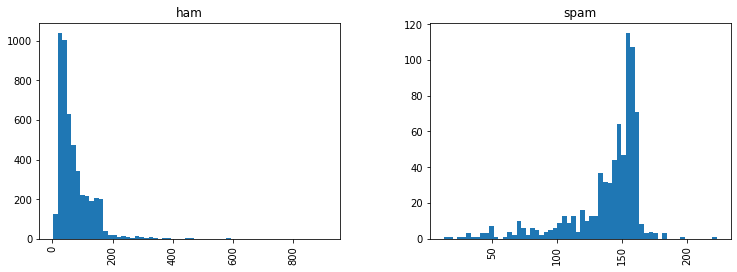

In [33]:
# X-Axis = Length
# Y-Axis = Frequencies

# We can clearly see that length of spam messages is usually more than the ham messages
# as shown in the histogram below
# Most of the ham messages have length around 70-80 characters,
# While most of the spam messages have length around 160-180 characters.

# So, it looks like that length is a good feature to distinguish a spam message vs ham message

messages.hist(column="length", by="label",bins=60,figsize=(12,4))

In [34]:
# Now we will clean our data

In [35]:
# import list of stopwords (words which are so common, 
# So they will not help us in distinguishing), so better remove them

from nltk.corpus import stopwords 

In [36]:
# List of all stopwords 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# for using string.punctuations (contain the list of all punctuations)
import string

In [41]:
# Now we have to perform following actions on our messages

# 1. Remove Punctuations
# 2. Remove Stop Words
# 3. Return lish of clean text words

def text_process(message):
    noPunc = [char for char in message if char not in string.punctuation]
   
    noPunc = ''.join(noPunc) # to concat/append the response in a single message
    
    return [word for word in noPunc.split() if word.lower() not in stopwords.words('english')]


In [45]:
# Our data after cleaning

messages['message'].head().apply(text_process)  

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# Now we have messages in form of tokens, but we have to convert it into vector, So machine learning models can understand